In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/walmart.csv')

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
data.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
data.shape

(6435, 8)

In [ ]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

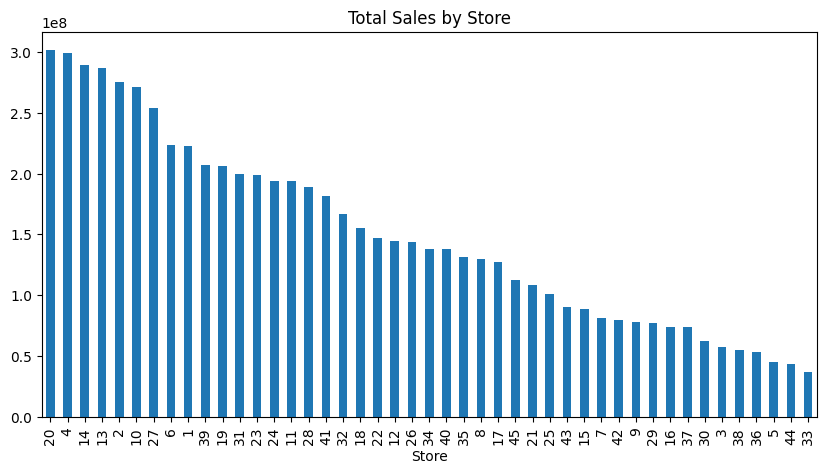

In [ ]:
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
store_sales.plot(kind='bar', figsize=(10,5))
plt.title('Total Sales by Store')
plt.show()

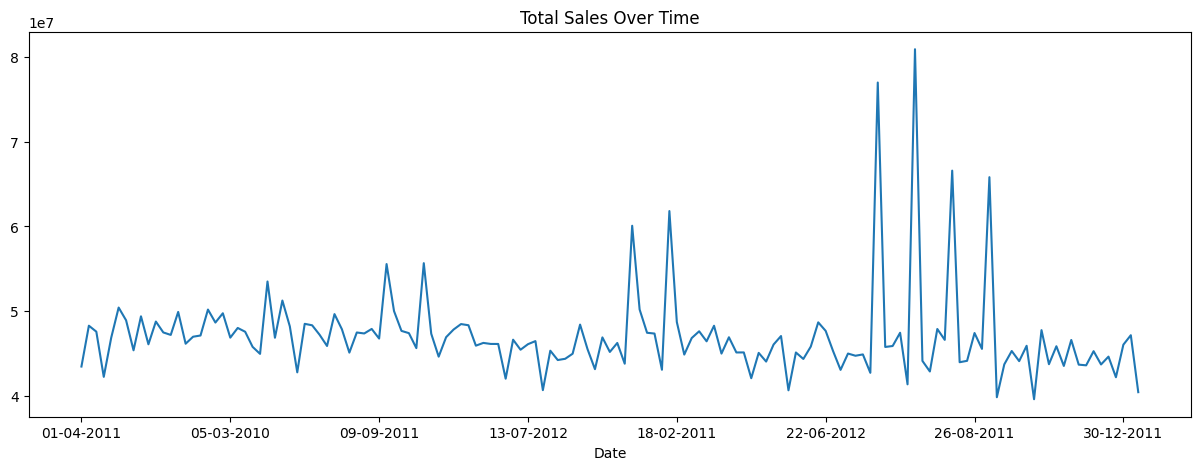

In [ ]:
data.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(15,5))
plt.title('Total Sales Over Time')
plt.show()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [ ]:
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Lag feature (sales last week)
data['Lag_1'] = data.groupby(['Store'])['Weekly_Sales'].shift(1)

# Rolling mean (last 4 weeks)
data['Rolling_Mean_4'] = data.groupby(['Store'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(4).mean())

In [ ]:
# Sort by date
data = data.sort_values(by='Date')

# Train: 2010-2012, Test: 2012-2013 (example)
train = data[data['Date'] < '2012-01-01']
test = data[data['Date'] >= '2012-01-01']

features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Month', 'Year']
target = 'Weekly_Sales'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

#Implementing Linear Regression

In [ ]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Align X_test and y_test after dropping NaNs, similar to X_train/y_train
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

y_pred = model.predict(X_test_clean)
rmse = np.sqrt(mean_squared_error(y_test_clean, y_pred))
print(f'RMSE: {rmse}')

RMSE: 510406.0351891366


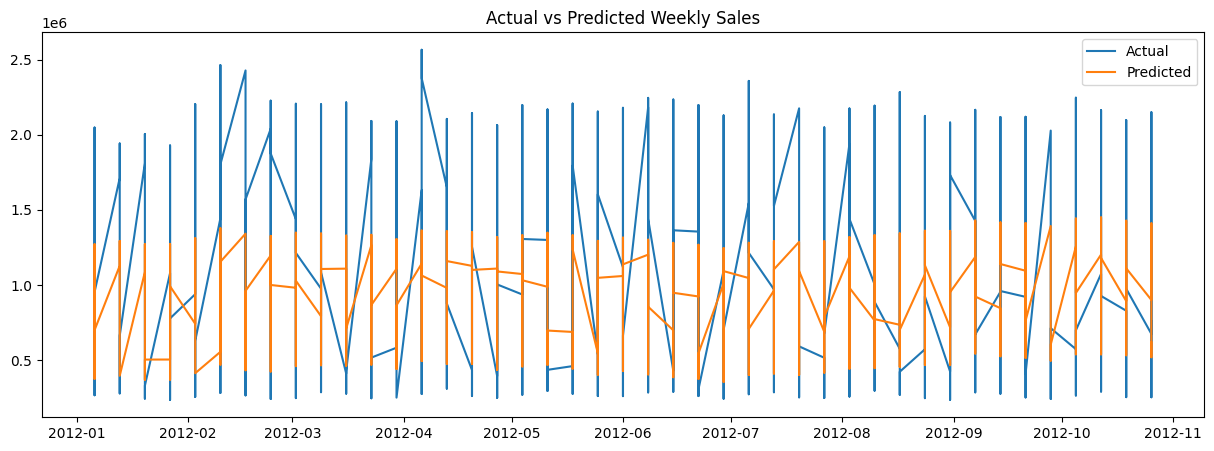

In [ ]:
plt.figure(figsize=(15,5))
# Use y_test_clean and the corresponding dates from the 'test' DataFrame
plt.plot(test.loc[X_test_clean.index, 'Date'], y_test_clean, label='Actual')
plt.plot(test.loc[X_test_clean.index, 'Date'], y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.show()

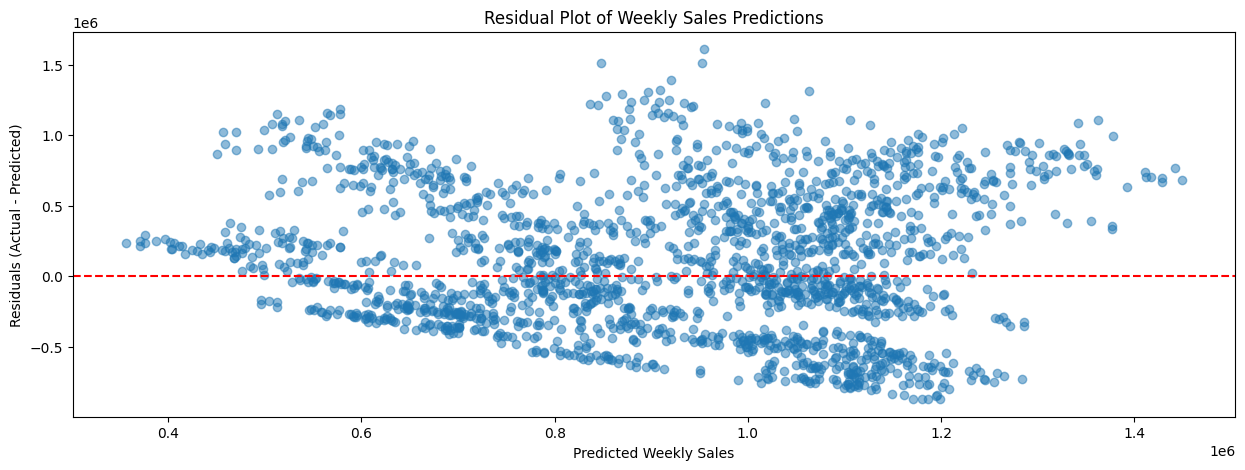

In [ ]:
residuals = y_test_clean - y_pred

plt.figure(figsize=(15, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot of Weekly Sales Predictions')
plt.show()

### Implementing Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can tune n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
print(f'Random Forest RMSE: {rf_rmse}')

Random Forest RMSE: 281641.23089835845


### Visualizing Random Forest Predictions

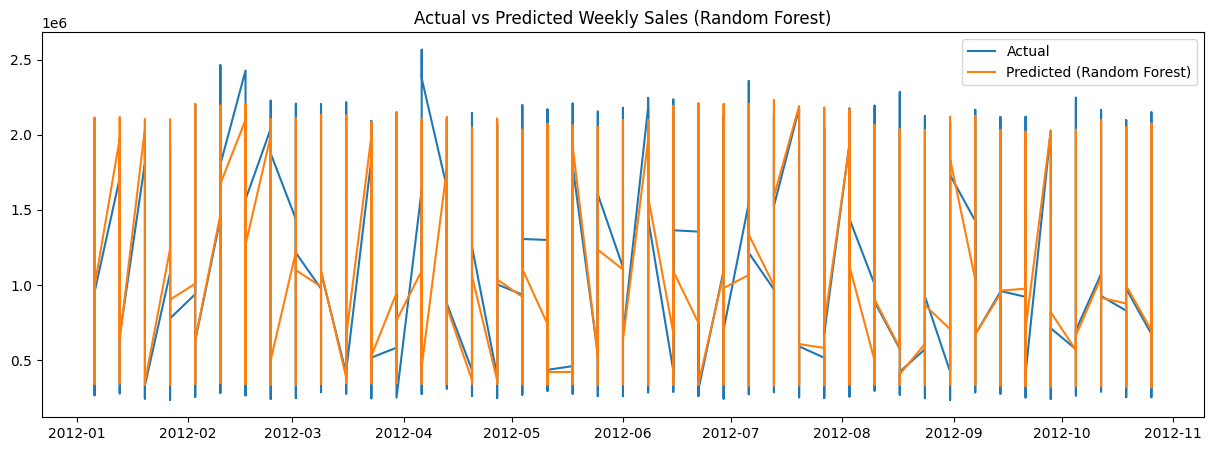

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test['Date'], y_test, label='Actual')
plt.plot(test['Date'], rf_y_pred, label='Predicted (Random Forest)')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales (Random Forest)')
plt.show()

### Analyzing Random Forest Residuals

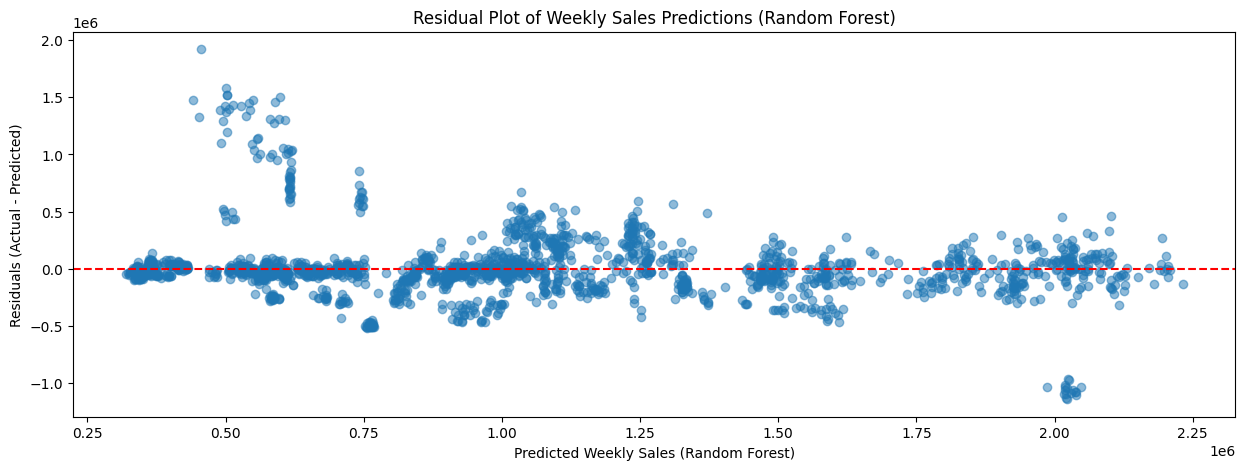

In [ ]:
rf_residuals = y_test - rf_y_pred

plt.figure(figsize=(15, 5))
plt.scatter(rf_y_pred, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales (Random Forest)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot of Weekly Sales Predictions (Random Forest)')
plt.show()

Let's analyze the residuals to understand the model's performance better. Residuals are the differences between the actual and predicted values.

### Comparing Model Accuracy (RMSE)

In [ ]:
mape_rf = np.mean(np.abs((y_test - rf_y_pred) / y_test)) * 100
print(f'Random Forest MAPE: {mape_rf:.2f}%')

Random Forest MAPE: 17.61%


In [ ]:
import numpy as np

# Assuming y_test and y_pred are your actual and predicted values respectively
# For Linear Regression model:
mape_lr = np.mean(np.abs((y_test_clean - y_pred) / y_test_clean)) * 100
accuracy_lr = 100 - mape_lr
print(f'Linear Regression MAPE: {mape_lr:.2f}%')
print(f'Linear Regression Accuracy: {accuracy_lr:.2f}%')

# For Random Forest model:
mape_rf = np.mean(np.abs((y_test - rf_y_pred) / y_test)) * 100
accuracy_rf = 100 - mape_rf
print(f'Random Forest MAPE: {mape_rf:.2f}%')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}%')

Linear Regression MAPE: 52.29%
Linear Regression Accuracy: 47.71%
Random Forest MAPE: 17.61%
Random Forest Accuracy: 82.39%


In [ ]:
print(f'Linear Regression RMSE: {rmse}')
print(f'Random Forest RMSE: {rf_rmse}')

if rf_rmse < rmse:
    print(f'The Random Forest model is more accurate, with an RMSE {rmse - rf_rmse:.2f} lower than the Linear Regression model.')
elif rmse < rf_rmse:
    print(f'The Linear Regression model is more accurate, with an RMSE {rf_rmse - rmse:.2f} lower than the Random Forest model.')
else:
    print('Both models have similar accuracy.')

Linear Regression RMSE: 510406.0351891366
Random Forest RMSE: 281641.23089835845
The Random Forest model is more accurate, with an RMSE 228764.80 lower than the Linear Regression model.


### Implementing ARIMA (AutoRegressive Integrated Moving Average) Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# For simplicity, let's pick one store (Store 1) for ARIMA modeling
store_1_data = data[data['Store'] == 1].set_index('Date').sort_index()

# Ensure the data is complete for the time series model (no missing dates)
# Fill any missing dates if necessary, or resample
# For this example, we'll assume the weekly data is consistent for Store 1

# Select the target variable
ts_data = store_1_data['Weekly_Sales']

# Split into training and testing sets based on the previous split date
arima_train = ts_data[ts_data.index < '2012-01-01']
arima_test = ts_data[ts_data.index >= '2012-01-01']

print(f"ARIMA Training data shape: {arima_train.shape}")
print(f"ARIMA Test data shape: {arima_test.shape}")


ARIMA Training data shape: (100,)
ARIMA Test data shape: (43,)


To determine the order (p, d, q) for ARIMA, one typically uses ACF and PACF plots or an `auto_arima` function. For this example, we'll start with a common order like (5,1,0) (AR=5, I=1 for differencing, MA=0).

In [ ]:
# Fit ARIMA model
# (p, d, q) order: p=AR order, d=differencing order, q=MA order
# Here, we use d=1 because 'Weekly_Sales' often exhibits seasonality and trend, making it non-stationary.
# A common starting point for p is often related to the number of lags identified in PACF.
# A common starting point for q is often related to the number of lags identified in ACF.
arima_model = ARIMA(arima_train, order=(5,1,0))
arima_fit = arima_model.fit()

print(arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1334.477
Date:                Sat, 31 Jan 2026   AIC                           2680.954
Time:                        12:04:26   BIC                           2696.525
Sample:                    02-05-2010   HQIC                          2687.254
                         - 12-30-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3445      0.047     -7.384      0.000      -0.436      -0.253
ar.L2         -0.2866      0.051     -5.621      0.000      -0.387      -0.187
ar.L3         -0.2464      0.069     -3.591      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
# Make predictions on the test set
arima_pred = arima_fit.predict(start=len(arima_train), end=len(ts_data)-1)

# Align predictions with the test set index
arima_pred.index = arima_test.index

# Evaluate the model
arima_rmse = np.sqrt(mean_squared_error(arima_test, arima_pred))
print(f'ARIMA RMSE for Store 1: {arima_rmse}')

ARIMA RMSE for Store 1: 209623.7097067811


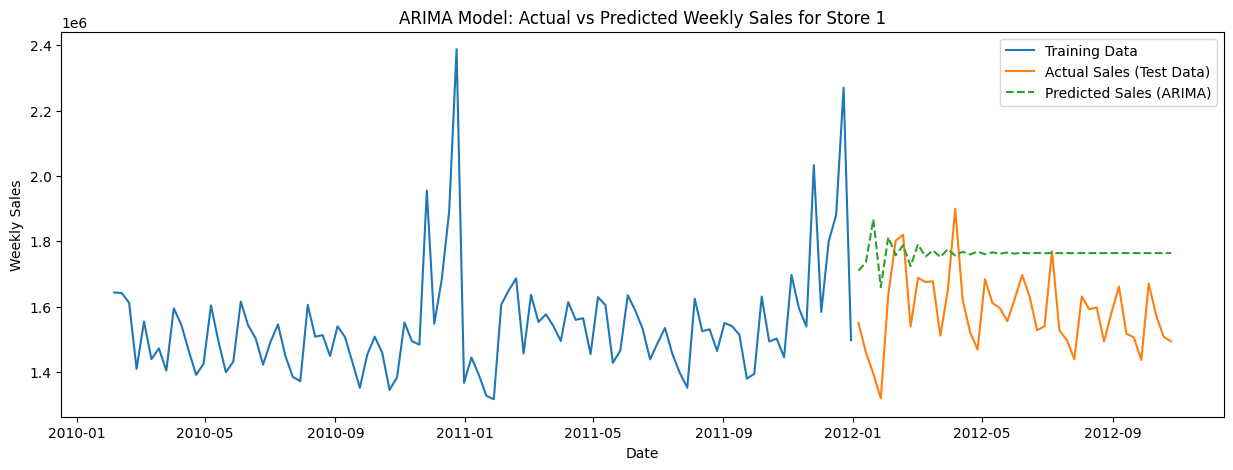

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(arima_train.index, arima_train, label='Training Data')
plt.plot(arima_test.index, arima_test, label='Actual Sales (Test Data)')
plt.plot(arima_test.index, arima_pred, label='Predicted Sales (ARIMA)', linestyle='--')
plt.legend()
plt.title('ARIMA Model: Actual vs Predicted Weekly Sales for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

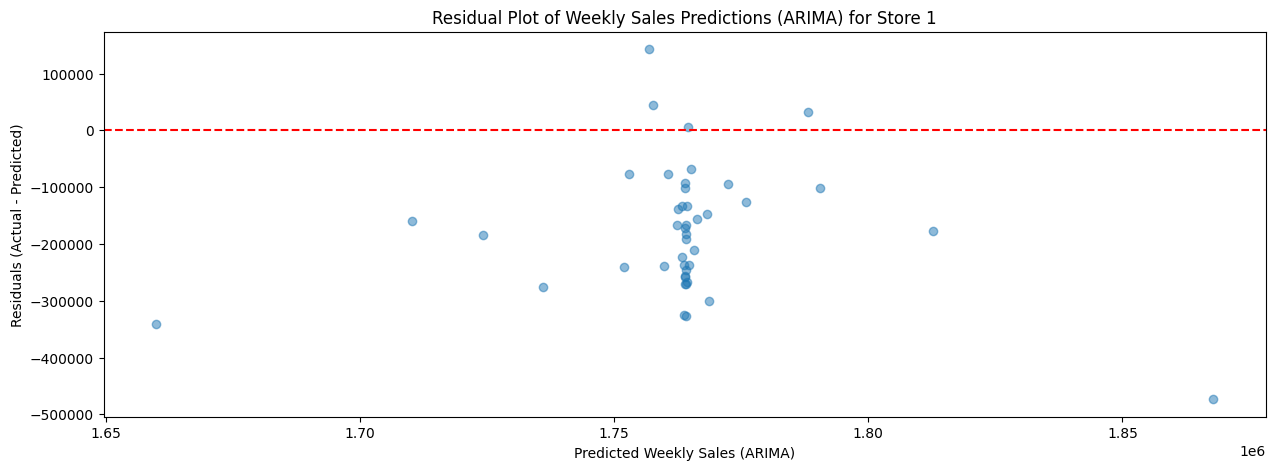

In [ ]:
arima_residuals = arima_test - arima_pred

plt.figure(figsize=(15, 5))
plt.scatter(arima_pred, arima_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Weekly Sales (ARIMA)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot of Weekly Sales Predictions (ARIMA) for Store 1')
plt.show()

In [42]:
import joblib

joblib.dump(model, "sales_model.joblib")

['sales_model.joblib']